# Exploratory Data Analysis

In [33]:
import pandas as pd

df = pd.read_csv("../data/listings_dec18.csv")

/var/folders/kc/4swzx7w979z6w9js5c61gt7h0000gn/T/ipykernel_25654/2394515246.py:3: DtypeWarning: Columns (43,61,62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/listings_dec18.csv")


In [34]:
print(df.shape)
print(df.info())

(36662, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36662 non-null  int64  
 1   listing_url                       36662 non-null  object 
 2   scrape_id                         36662 non-null  int64  
 3   last_scraped                      36662 non-null  object 
 4   name                              36650 non-null  object 
 5   summary                           35641 non-null  object 
 6   space                             25052 non-null  object 
 7   description                       36115 non-null  object 
 8   experiences_offered               36662 non-null  object 
 9   neighborhood_overview             21617 non-null  object 
 10  notes                             14907 non-null  object 
 11  transit                           22096 non-null  objec

In [22]:
# price data handling testing
df["price"] = (
    df["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)
df["price"].head()

0    100.0
1    471.0
2    109.0
3    450.0
4     62.0
Name: price, dtype: float64

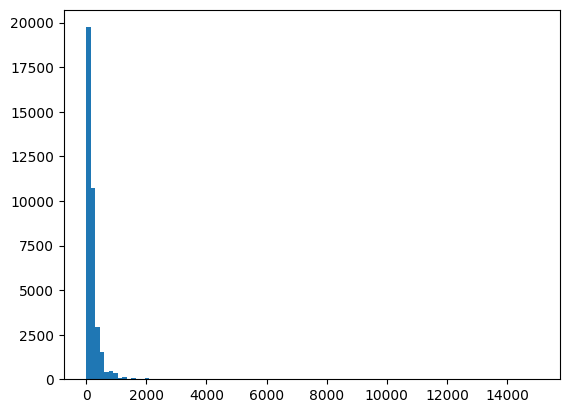

In [23]:
# Plot the distribution of price
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=100)
plt.show()

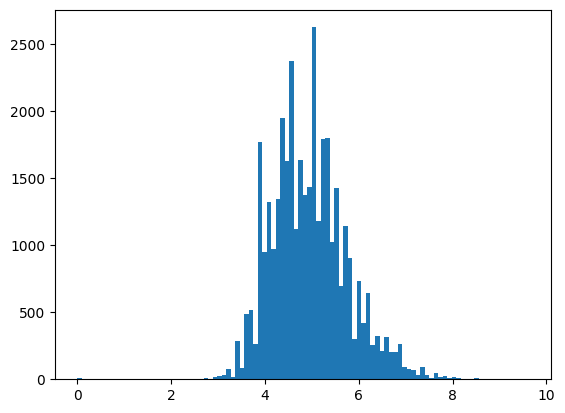

In [24]:
# Try log price
import numpy as np

df["log_price"] = np.log1p(df["price"])
plt.hist(df["log_price"], bins=100)
plt.show()

In [25]:
# Missing value check
df.isnull().mean().sort_values(ascending=False).head(20)

neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
host_acceptance_rate            1.000000
xl_picture_url                  1.000000
medium_url                      1.000000
thumbnail_url                   1.000000
license                         0.997927
square_feet                     0.993317
monthly_price                   0.939638
weekly_price                    0.900415
notes                           0.593394
host_response_rate              0.487808
host_response_time              0.487808
host_about                      0.474770
interaction                     0.447602
house_rules                     0.415526
neighborhood_overview           0.410370
access                          0.408979
transit                         0.397305
security_deposit                0.370083
dtype: float64

Since the values above 2000 are considered "extreme", we see if we can delete all those.

In [26]:
print(f"{df[df['price'] > 2000].shape[0]} extreme values")
print(f"Maximum price: ${df['price'].max()}")

107 extreme values
Maximum price: $14999.0


Since extreme values only weight 0.29% in the entire dataset, deleting them would have almost no effects on the distribution. We remove extreme outliers above the 99.7th percentile and applied log transformation to stabilise variance.

In [27]:
df = df[df["price"] <= 2000]
df["log_price"] = np.log1p(df["price"])

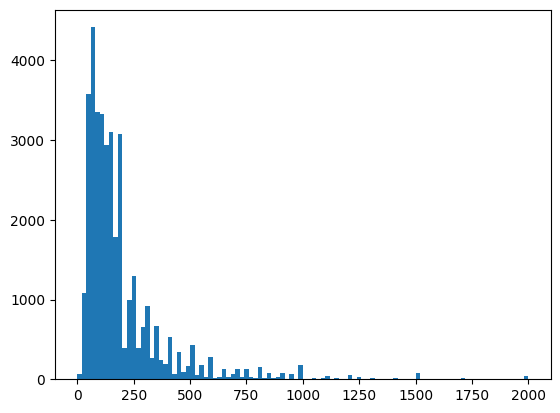

In [28]:
plt.hist(df["price"], bins=100)
plt.show()

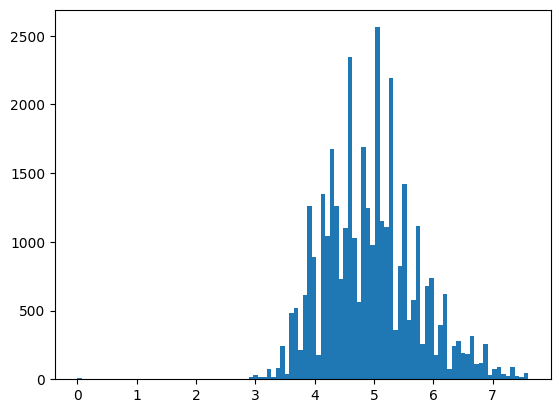

In [29]:
plt.hist(df["log_price"], bins=100)
plt.show()

In [30]:
# Check missing data
df[[
    "bathrooms",
    "bedrooms",
    "beds",
    "review_scores_rating",
    "reviews_per_month"
]].isnull().mean()

bathrooms               0.000520
bedrooms                0.000246
beds                    0.001067
review_scores_rating    0.356723
reviews_per_month       0.324278
dtype: float64

In [35]:
def clean_basic(df):
    df = df.copy()

    # clean price
    df["price"] = (
        df["price"]
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

    # remove outliers
    df = df[df["price"] <= 2000]

    # log transform
    df["log_price"] = np.log1p(df["price"])

    # drop tiny NA
    df = df.dropna(subset=["bathrooms", "bedrooms", "beds"])

    # fill review NA
    df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
    df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

    return df

In [36]:
cleaned = clean_basic(df)

In [37]:
cleaned.shape

(36499, 97)

In [38]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36499 entries, 0 to 36661
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36499 non-null  int64  
 1   listing_url                       36499 non-null  object 
 2   scrape_id                         36499 non-null  int64  
 3   last_scraped                      36499 non-null  object 
 4   name                              36487 non-null  object 
 5   summary                           35491 non-null  object 
 6   space                             24934 non-null  object 
 7   description                       35952 non-null  object 
 8   experiences_offered               36499 non-null  object 
 9   neighborhood_overview             21536 non-null  object 
 10  notes                             14842 non-null  object 
 11  transit                           22039 non-null  object 
 12  access   

In [54]:
cat = cleaned.select_dtypes(exclude="number")

In [55]:
cat["cancellation_policy"].head()

0    strict_14_with_grace_period
1    strict_14_with_grace_period
2    strict_14_with_grace_period
3    strict_14_with_grace_period
4                       moderate
Name: cancellation_policy, dtype: object

In [57]:
cat["instant_bookable"].info()

<class 'pandas.core.series.Series'>
Index: 36499 entries, 0 to 36661
Series name: instant_bookable
Non-Null Count  Dtype 
--------------  ----- 
36499 non-null  object
dtypes: object(1)
memory usage: 570.3+ KB
